<a href="https://colab.research.google.com/github/Fadlanbima/BADAI_UAS_KapSel/blob/main/UAS_KapSel_Kelompok_Badai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Fadlanbima/BADAI_UAS_KapSel.git

Cloning into 'BADAI_UAS_KapSel'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 175 (delta 84), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (175/175), 5.34 MiB | 2.47 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=4fa4c690202e00a78293dfe06bcba9efd96485394f95b093ef75b6e334fe8dda
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [ ]:
pip install Unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from BADAI_UAS_KapSel import TextMining as tm
from BADAI_UAS_KapSel import CleanText as ct
from BADAI_UAS_KapSel import modelling as mdg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
dataPath = tm.crawlFiles('/content/BADAI_UAS_KapSel/data', types = 'json')

In [ ]:
data = pd.concat([pd.read_json(f, lines = True) for f in dataPath])

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
N, P = data.shape
'baris = ', N, ' kolom = ', P

('baris = ', 15670, ' kolom = ', 31)

In [ ]:
data.keys()

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'lang', 'extended_entities', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [ ]:
user = data['user']
nama = []
for i in user:
  nama.append(i)

In [ ]:
username = pd.DataFrame(nama)
username = username[['name', 'screen_name', 'location', 'verified', 'followers_count', 'friends_count']]
username.head()

,name,screen_name,location,verified,followers_count,friends_count
0,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,False,83,2436
1,Gibera Kata,giberakata,,False,2294,2512
2,Jejak Literasi,Jelita2020,West Java,False,1764,1899
3,WahanaNews Official,wahananewsdotco,Jakarta,False,4996,4856
4,Ratu.,belamouvr,JAKSEL + NSFW,False,176,243


In [ ]:
username.keys()

Index(['name', 'screen_name', 'location', 'verified', 'followers_count',
       'friends_count'],
      dtype='object')

In [ ]:
username.keys()

Index(['name', 'screen_name', 'location', 'verified', 'followers_count',
       'friends_count'],
      dtype='object')

In [ ]:
dataready = pd.concat([data, username], axis=1)
dataready.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,name,screen_name,location,verified,followers_count,friends_count
0,2021-12-10 08:52:24+00:00,1469228494202626053,1469228494202626048,RT @kumparan: Pohon dengan ketinggian 10 meter...,False,"[0, 127]","{'hashtags': [{'text': 'kumparanNEWS', 'indice...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 1392836278312341510, 'id_str': '1392836...",None,None,None,NaN,{'created_at': 'Fri Dec 10 08:46:10 +0000 2021...,False,1,0,False,False,0.0,in,NaN,NaN,NaN,NaN,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,False,83,2436
1,2021-12-10 08:52:06+00:00,1469228418709397504,1469228418709397504,RT @wahananewsdotco: Angin Kencang Acak-acak 2...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,None,"{'id': 1201741859640397824, 'id_str': '1201741...",None,None,None,NaN,{'created_at': 'Fri Dec 10 08:49:02 +0000 2021...,False,4,0,False,False,0.0,in,NaN,NaN,NaN,NaN,Gibera Kata,giberakata,,False,2294,2512
2,2021-12-10 08:49:32+00:00,1469227773176598530,1469227773176598528,RT @wahananewsdotco: Angin Kencang Acak-acak 2...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,None,"{'id': 1209638707973607424, 'id_str': '1209638...",None,None,None,NaN,{'created_at': 'Fri Dec 10 08:49:02 +0000 2021...,False,4,0,False,False,0.0,in,NaN,NaN,NaN,NaN,Jejak Literasi,Jelita2020,West Java,False,1764,1899
3,2021-12-10 08:49:02+00:00,1469227647263596544,1469227647263596544,Angin Kencang Acak-acak 28 Rumah di Sorong Pap...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,None,"{'id': 1124517245722349568, 'id_str': '1124517...",None,None,None,NaN,NaN,False,4,0,False,False,0.0,in,NaN,NaN,NaN,NaN,WahanaNews Official,wahananewsdotco,Jakarta,False,4996,4856
4,2021-12-10 08:46:16+00:00,1469226949612490753,1469226949612490752,"️\n\n️\n\n️\n""ADUH!""\n\nBarusan itu teriakan R...",False,"[0, 268]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.468893e+18,1.468893e+18,1.322664e+18,1.322664e+18,belamouvr,"{'id': 1322663640034541568, 'id_str': '1322663...",None,None,None,NaN,NaN,False,0,0,False,False,NaN,in,NaN,NaN,NaN,NaN,Ratu.,belamouvr,JAKSEL + NSFW,False,176,243


In [ ]:
N, P = dataready.shape
'baris = ', N, ' kolom = ', P

('baris = ', 15670, ' kolom = ', 37)

In [ ]:
dataready.rename(columns={'full_text':'text'}, inplace=True)

#PREPROCESSING

In [ ]:
dataready = ct.cleanningtext(data = dataready, both = True, onlyclean = False, sentiment = False)

Cleaning Text


100%|██████████| 15670/15670 [00:00<00:00, 219566.99it/s]

37.99582052230835 seconds


In [ ]:
dataready.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'display_text_range',
       'entities', 'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'name',
       'screen_name', 'location', 'verified', 'followers_count',
       'friends_count', 'cleaned_text'],
      dtype='object')

In [ ]:
dataready = dataready[['id', 'text', 'geo', 'coordinates', 'place', 'contributors', 'retweet_count', 'favorite_count', 'lang', 'name', 'screen_name', 'location', 'followers_count', 'friends_count', 'cleaned_text']]

In [ ]:
!pip install unidecode textblob sastrawi
!pip install unidecode twython tweepy beautifulsoup4 tika
!pip install spacy python-crfsuite unidecode textblob sastrawi
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from nltk.tokenize import TweetTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('popular')
nltk.download('punkt')

     |████████████████████████████████| 209 kB 4.9 MB/s 
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=30b136c846b46ca8990b9370dc73e619280462e72fcf851974e7ee3978dc0036
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika
     |████████████████████████████████| 743 kB 5.0 MB/s 
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...


True

In [ ]:
import re
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub
    return temp

In [ ]:
dataready['clean'] = dataready['text'].apply(lambda x: clean_tweet(x))
dataready.head()

,id,text,geo,coordinates,place,contributors,retweet_count,favorite_count,lang,name,screen_name,location,followers_count,friends_count,cleaned_text,clean
0,1469228494202626053,rt @kumparan: pohon dengan ketinggian 10 meter...,None,None,None,NaN,1,0,in,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,83,2436,pohon ketinggian meter menimpa pengendara vesp...,<function sub at 0x7fafb11568c0>
1,1469228418709397504,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Gibera Kata,giberakata,,2294,2512,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>
2,1469227773176598530,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Jejak Literasi,Jelita2020,West Java,1764,1899,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>
3,1469227647263596544,angin kencang acak-acak 28 rumah di sorong pap...,None,None,None,NaN,4,0,in,WahanaNews Official,wahananewsdotco,Jakarta,4996,4856,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>
4,1469226949612490753,"️\n\n️\n\n️\n""aduh!""\n\nbarusan itu teriakan r...",None,None,None,NaN,0,0,in,Ratu.,belamouvr,JAKSEL + NSFW,176,243,barusan teriakan ratu matanya kelilipan rambu...,<function sub at 0x7fafb11568c0>


In [ ]:
Tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

def tokenization(text):
    teks= Tokenizer.tokenize(text)
    return teks

dataready['tokenized'] = dataready['cleaned_text'].apply(lambda x: tokenization(x))
dataready.head()

,id,text,geo,coordinates,place,contributors,retweet_count,favorite_count,lang,name,screen_name,location,followers_count,friends_count,cleaned_text,clean,tokenized
0,1469228494202626053,rt @kumparan: pohon dengan ketinggian 10 meter...,None,None,None,NaN,1,0,in,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,83,2436,pohon ketinggian meter menimpa pengendara vesp...,<function sub at 0x7fafb11568c0>,"[pohon, ketinggian, meter, menimpa, pengendara..."
1,1469228418709397504,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Gibera Kata,giberakata,,2294,2512,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa..."
2,1469227773176598530,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Jejak Literasi,Jelita2020,West Java,1764,1899,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa..."
3,1469227647263596544,angin kencang acak-acak 28 rumah di sorong pap...,None,None,None,NaN,4,0,in,WahanaNews Official,wahananewsdotco,Jakarta,4996,4856,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa..."
4,1469226949612490753,"️\n\n️\n\n️\n""aduh!""\n\nbarusan itu teriakan r...",None,None,None,NaN,0,0,in,Ratu.,belamouvr,JAKSEL + NSFW,176,243,barusan teriakan ratu matanya kelilipan rambu...,<function sub at 0x7fafb11568c0>,"[barusan, teriakan, ratu, matanya, kelilipan, ..."


In [ ]:
factory = StopWordRemoverFactory()

Sastrawi_StopWords_id = factory.get_stop_words()

stopword = Sastrawi_StopWords_id + ['rt']

print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
dataready['stopword_remove'] = dataready['tokenized'].apply(lambda x: remove_stopwords(x))
dataready.head()

,id,text,geo,coordinates,place,contributors,retweet_count,favorite_count,lang,name,screen_name,location,followers_count,friends_count,cleaned_text,clean,tokenized,stopword_remove
0,1469228494202626053,rt @kumparan: pohon dengan ketinggian 10 meter...,None,None,None,NaN,1,0,in,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,83,2436,pohon ketinggian meter menimpa pengendara vesp...,<function sub at 0x7fafb11568c0>,"[pohon, ketinggian, meter, menimpa, pengendara...","[pohon, ketinggian, meter, menimpa, pengendara..."
1,1469228418709397504,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Gibera Kata,giberakata,,2294,2512,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
2,1469227773176598530,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Jejak Literasi,Jelita2020,West Java,1764,1899,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
3,1469227647263596544,angin kencang acak-acak 28 rumah di sorong pap...,None,None,None,NaN,4,0,in,WahanaNews Official,wahananewsdotco,Jakarta,4996,4856,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
4,1469226949612490753,"️\n\n️\n\n️\n""aduh!""\n\nbarusan itu teriakan r...",None,None,None,NaN,0,0,in,Ratu.,belamouvr,JAKSEL + NSFW,176,243,barusan teriakan ratu matanya kelilipan rambu...,<function sub at 0x7fafb11568c0>,"[barusan, teriakan, ratu, matanya, kelilipan, ...","[barusan, teriakan, ratu, matanya, kelilipan, ..."


In [ ]:
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

dataready['stemmed'] = dataready['stopword_remove'].apply(lambda x: stemming(x))
dataready.head()

,id,text,geo,coordinates,place,contributors,retweet_count,favorite_count,lang,name,screen_name,location,followers_count,friends_count,cleaned_text,clean,tokenized,stopword_remove,stemmed
0,1469228494202626053,rt @kumparan: pohon dengan ketinggian 10 meter...,None,None,None,NaN,1,0,in,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,83,2436,pohon ketinggian meter menimpa pengendara vesp...,<function sub at 0x7fafb11568c0>,"[pohon, ketinggian, meter, menimpa, pengendara...","[pohon, ketinggian, meter, menimpa, pengendara...","[pohon, tinggi, meter, timpa, kendara, vespa, ..."
1,1469228418709397504,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Gibera Kata,giberakata,,2294,2512,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
2,1469227773176598530,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Jejak Literasi,Jelita2020,West Java,1764,1899,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
3,1469227647263596544,angin kencang acak-acak 28 rumah di sorong pap...,None,None,None,NaN,4,0,in,WahanaNews Official,wahananewsdotco,Jakarta,4996,4856,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa..."
4,1469226949612490753,"️\n\n️\n\n️\n""aduh!""\n\nbarusan itu teriakan r...",None,None,None,NaN,0,0,in,Ratu.,belamouvr,JAKSEL + NSFW,176,243,barusan teriakan ratu matanya kelilipan rambu...,<function sub at 0x7fafb11568c0>,"[barusan, teriakan, ratu, matanya, kelilipan, ...","[barusan, teriakan, ratu, matanya, kelilipan, ...","[barusan, ria, ratu, mata, kelilip, rambut, an..."


In [ ]:
def cleanning (text):
    text = " ".join(word for word in text)
    return text

dataready['clean_text'] = dataready['stopword_remove'].apply(lambda x: cleanning(x))
dataready.head()

,id,text,geo,coordinates,place,contributors,retweet_count,favorite_count,lang,name,screen_name,location,followers_count,friends_count,cleaned_text,clean,tokenized,stopword_remove,stemmed,clean_text
0,1469228494202626053,rt @kumparan: pohon dengan ketinggian 10 meter...,None,None,None,NaN,1,0,in,GIGIEN GERHANA 🌕,gigien_g,Bandung City - Indonesia🌄,83,2436,pohon ketinggian meter menimpa pengendara vesp...,<function sub at 0x7fafb11568c0>,"[pohon, ketinggian, meter, menimpa, pengendara...","[pohon, ketinggian, meter, menimpa, pengendara...","[pohon, tinggi, meter, timpa, kendara, vespa, ...",pohon ketinggian meter menimpa pengendara vesp...
1,1469228418709397504,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Gibera Kata,giberakata,,2294,2512,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...",angin kencang acak acak rumah sorong papua
2,1469227773176598530,rt @wahananewsdotco: angin kencang acak-acak 2...,None,None,None,NaN,4,0,in,Jejak Literasi,Jelita2020,West Java,1764,1899,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...",angin kencang acak acak rumah sorong papua
3,1469227647263596544,angin kencang acak-acak 28 rumah di sorong pap...,None,None,None,NaN,4,0,in,WahanaNews Official,wahananewsdotco,Jakarta,4996,4856,angin kencang acak acak rumah sorong papua,<function sub at 0x7fafb11568c0>,"[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...","[angin, kencang, acak, acak, rumah, sorong, pa...",angin kencang acak acak rumah sorong papua
4,1469226949612490753,"️\n\n️\n\n️\n""aduh!""\n\nbarusan itu teriakan r...",None,None,None,NaN,0,0,in,Ratu.,belamouvr,JAKSEL + NSFW,176,243,barusan teriakan ratu matanya kelilipan rambu...,<function sub at 0x7fafb11568c0>,"[barusan, teriakan, ratu, matanya, kelilipan, ...","[barusan, teriakan, ratu, matanya, kelilipan, ...","[barusan, ria, ratu, mata, kelilip, rambut, an...",barusan teriakan ratu matanya kelilipan rambut...


In [ ]:
dataready.to_json('/content/dataready.json', orient='records')

In [ ]:
datafinal1 = dataready[['clean_text']]

In [ ]:
datafinal1

,clean_text
0,pohon ketinggian meter menimpa pengendara vesp...
1,angin kencang acak acak rumah sorong papua
2,angin kencang acak acak rumah sorong papua
3,angin kencang acak acak rumah sorong papua
4,barusan teriakan ratu matanya kelilipan rambut...
...,...
15665,relawan lpbi kabupaten bangkalan menyerahkan b...
15666,relawan lpbi kabupaten bangkalan menyerahkan b...
15667,relawan lpbi kabupaten bangkalan menyerahkan b...
15668,rumah hujan badai angin topan badai katrina pu...


In [ ]:
datafinal = dataready[['cleaned_text']]

#BEBERAPA EDA SEDERHANA

In [ ]:
retweet = dataready[['cleaned_text', 'retweet_count']]
retweet.sort_values(by=['retweet_count'], ascending=False).head()

,cleaned_text,retweet_count
2316,pelajari penulisan judul berita janda cianjur ...,9310
14116,dating kancil panas terik aircond rosak plak p...,5793
10044,randy bagus sasongko enak pelaku pemerkosa dit...,5725
7598,lelah berantakan ngerasa dilakuin sia ngerasa ...,4222
8753,taekook Trapped pagi jungkook ngetweet cowok g...,732


In [ ]:
like = dataready[['cleaned_text', 'favorite_count']]
like.sort_values(by=['favorite_count'], ascending=False).head()

,cleaned_text,favorite_count
599,nctbase pohon kencang angin menerpanya anggap ...,2622
9726,hujan baday angin ribut tiktoknya,2210
5245,hujan baday angin ribut tiktoknya,2210
10979,hujan badai bunda lalui puas terpuaskan servis...,1318
3009,heboh mensos risma kendalikan angin badai neti...,969


In [ ]:
followers = dataready[['name', 'followers_count']]
followers.sort_values(by=['followers_count'], ascending=False).head()

,name,followers_count
6031,detikcom,17299784
5214,detikcom,17299780
14595,detikcom,17299738
1591,detikcom,17299720
1257,detikcom,17299720


In [ ]:
friends = dataready[['name', 'friends_count']]
friends.sort_values(by=['friends_count'], ascending=False).head()

,name,friends_count
12,BANDUNG ᮘᮔ᮪ᮓᮥᮀ,216230
3567,BANDUNG ᮘᮔ᮪ᮓᮥᮀ,216230
3605,BANDUNG ᮘᮔ᮪ᮓᮥᮀ,216230
3603,BANDUNG ᮘᮔ᮪ᮓᮥᮀ,216230
12971,BANDUNG ᮘᮔ᮪ᮓᮥᮀ,216220


#SOCIAL NETWORK ANALITICS(GRAPH)

In [ ]:
!pip install unidecode
!pip install pyLDAvis
try:
    !wget https://raw.githubusercontent.com/taufikedys/Graph-Python-Nx/master/taudata.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !wget https://github.com/taufikedys/Graph-Python-Nx/blob/master/data.html
except:
    pass

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 34.6 MB/s 
     |████████████████████████████████| 11.3 MB 42.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=9bcb390929a53bd90e3d4fd746a73951632018c72483a0c8ea31bfa88c515932
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

--2021-12-13 09:53:51--  https://raw.githubusercontent.com/taufikedys/Graph-Python-Nx/master/taudata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-12-13 09:53:52 ERROR 404: Not Found.

--2021-12-13 09:53:52--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088 (20K) [text/plain]
Saving to: ‘taudata_sna.py’

taudata_sna.py      100%[===================>]  19.62K  --.-KB/s    in 0.001s  

2021-12-13 09:53:52 (21.5 MB/s) - ‘taudata_sna.py’

In [ ]:
# import beberapa module yg dibutuhkan di WorkShop ini:

import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
name = dataready.screen_name.to_list()
tweet = dataready.text.to_list()

In [ ]:
print(name[:3])

['gigien_g', 'giberakata', 'Jelita2020']


In [ ]:
print(tweet[:3])

['rt @kumparan: pohon dengan ketinggian 10 meter tersebut menimpa seorang pengendara vespa. #kumparannews https://t.co/sfg1bhljqc', 'rt @wahananewsdotco: angin kencang acak-acak 28 rumah di sorong papua https://t.co/556uasv74a', 'rt @wahananewsdotco: angin kencang acak-acak 28 rumah di sorong papua https://t.co/556uasv74a']


In [ ]:
G = nx.Graph()

G.add_nodes_from(name)

print('banyak vertex : ', G.number_of_nodes())
print('banyak edges : ', G.number_of_edges())

banyak vertex :  10511
banyak edges :  0


In [ ]:
for usr, t in zip(name, tweet):
  mentionS = re.findall("@([a-zA-Z0-9]{1,15})", t)
  for mention in mentionS:
    if "." not in mention:
      G.add_edge(usr, mention)

print("Banyak vertex = ", G.number_of_nodes())
print("Banyak edges = ", G.number_of_edges())

Banyak vertex =  13046
Banyak edges =  7734


In [ ]:
# untuk mendapatkan user yang paling di mention, untuk mendapatkan user yang paling populer, yang paling banyak dibicarakan orang terkait issue badai, hujan angin dan sebagainya
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['dppfpi', 'merapi', 'lelaki', 'ncitybase', 'seutaslara', 'e100ss', 'oposisicerdas', 'bpbdjakarta', 'mburhanuddin3', 'caraca']
Influencial Users Scores: [0.0268302  0.01786125 0.01556152 0.01494826 0.01418168 0.01264852
 0.01172863 0.00896895 0.00659256 0.00651591]


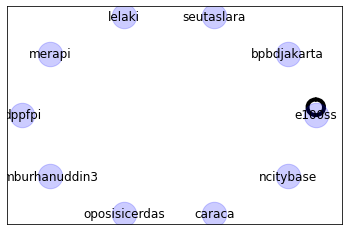

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

In [ ]:
# untuk melihat users yang berpotensi memviralkan suatu issue badai, hujan angin dan sebagainya
Gt1 = tau.Centrality(G, N=15, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['dppfpi', 'bpbdjakarta', 'actforhumanity', 'lelaki', 'ekurnia82', 'detikcom', 'AsepRachmat1967', 'merapi', 'romdhananas', 'beautydyah', 'oposisicerdas', 'Ibrahim78704863', 'onomsalam2pas', 'BocaBauKencur', 'tmcpoldametro']
Influencial Users Scores: [0.04525628 0.04508016 0.0450074  0.04498857 0.04488398 0.04368603
 0.04338147 0.04330163 0.04311813 0.04310579 0.04299993 0.04295087
 0.04264919 0.04257684 0.04257202]


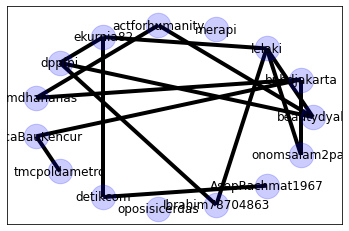

In [ ]:
tau.drawGraph(Gt1, True, layOut='circular')

In [ ]:
# mendapatkan user yang berpotensi untuk menghentikan menyebarnya issue badai, hujan angin dan sebagainya
Gt2 = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['dppfpi', 'askrlfess', 'giaontweet', 'merapi', 'bpbdjakarta', 'convomf', 'overthingqueen', 'lelaki', 'SonoraFM92', 'hutagaolpoltak']
Influencial Users Scores: [0.01962373 0.01490104 0.01437968 0.01379877 0.01147129 0.01117503
 0.01093406 0.01039564 0.00892395 0.00885897]


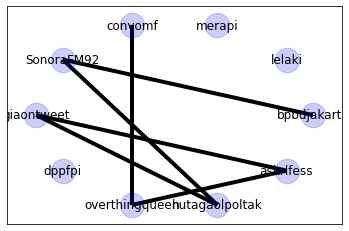

In [ ]:
tau.drawGraph(Gt2, True, layOut='circular')

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(Gt1.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups

[['beautydyah',
  'bpbdjakarta',
  'lelaki',
  'actforhumanity',
  'ekurnia82',
  'dppfpi',
  'romdhananas',
  'BocaBauKencur',
  'tmcpoldametro',
  'detikcom',
  'Ibrahim78704863',
  'AsepRachmat1967',
  'onomsalam2pas'],
 ['merapi'],
 ['oposisicerdas']]

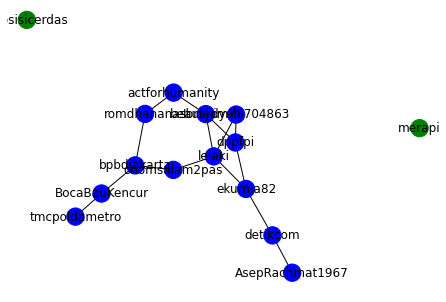

In [ ]:
# plot the communities
color_map = []
for node in Gt1:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(Gt1, node_color=color_map, with_labels=True)
plt.show()

#SENTIMENT ANALYSIS

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

datafinal['Subjectivity'] = datafinal['cleaned_text'].apply(getSubjectivity)
datafinal['Polarity'] = datafinal['cleaned_text'].apply(getPolarity)
datafinal

,cleaned_text,Subjectivity,Polarity
0,pohon ketinggian meter menimpa pengendara vesp...,0.0,0.0
1,angin kencang acak acak rumah sorong papua,0.0,0.0
2,angin kencang acak acak rumah sorong papua,0.0,0.0
3,angin kencang acak acak rumah sorong papua,0.0,0.0
4,barusan teriakan ratu matanya kelilipan rambu...,0.0,0.0
...,...,...,...
15665,relawan lpbi kabupaten bangkalan menyerahkan b...,0.0,0.0
15666,relawan lpbi kabupaten bangkalan menyerahkan b...,0.0,0.0
15667,relawan lpbi kabupaten bangkalan menyerahkan b...,0.0,0.0
15668,rumah hujan badai angin topan badai katrina pu...,0.0,0.0


In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

datafinal['Analitics'] = datafinal['Polarity'].apply(getAnalysis)
datafinal.head()

,cleaned_text,Subjectivity,Polarity,Analitics
0,pohon ketinggian meter menimpa pengendara vesp...,0.0,0.0,Neutral
1,angin kencang acak acak rumah sorong papua,0.0,0.0,Neutral
2,angin kencang acak acak rumah sorong papua,0.0,0.0,Neutral
3,angin kencang acak acak rumah sorong papua,0.0,0.0,Neutral
4,barusan teriakan ratu matanya kelilipan rambu...,0.0,0.0,Neutral


In [ ]:
datafinal['Analitics'].value_counts()

Neutral     14986
Positive      494
Negative      190
Name: Analitics, dtype: int64

#VISUALISASI

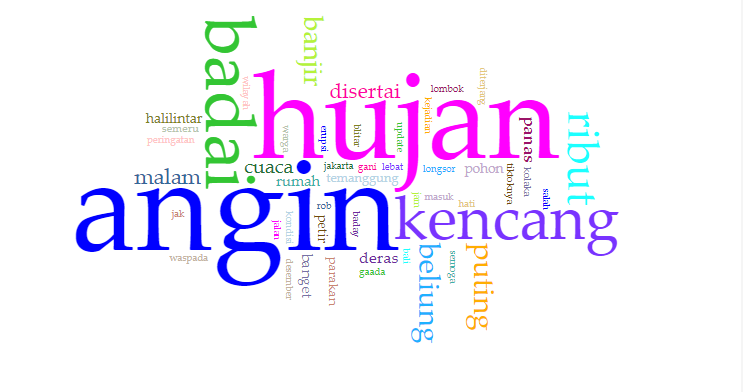

**Interpretasi Wordcloud :** Wordcloud diatas menunjukkan semakin besar ukuran katanya maka semakin sering kata tersebut muncul dalam data. Sehingga, dapat kita ketahui bahwa kata yang sering muncul dalam data adalah angin, hujan, kencang, dan badai

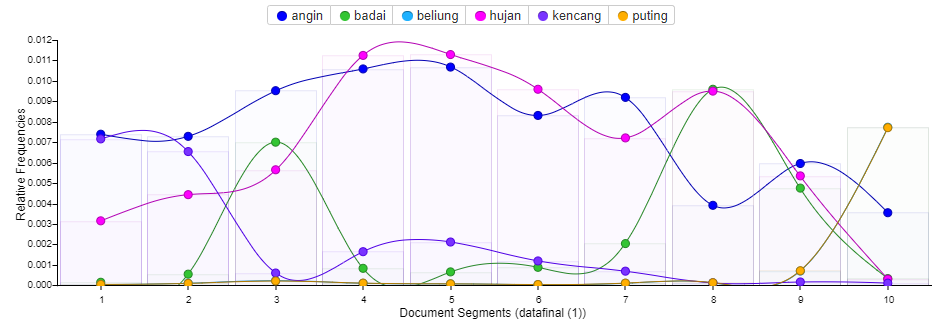

**Interpretasi Trends Anlaysis :** Visualisasi diatas menunjukkan korelasi antar kata. Dari gambar diatas dapat kita ketahui bahwa pada awalnya orang-orang tidak mengkaitkan antara topik mengenai hujan dan badai. Namun, ada masa dimana orang-orang mengkaitkan antara kedua topik tersebut hal ini bisa dilihat pada segmen ke 8 sampai 10. Begitu pula dengan topik mengenai angin dan kencang, ada masa dimana orang-orang mengkaitkan antara keduanya seperti bisa dilihat pada segmen ke 4 sampai 6.

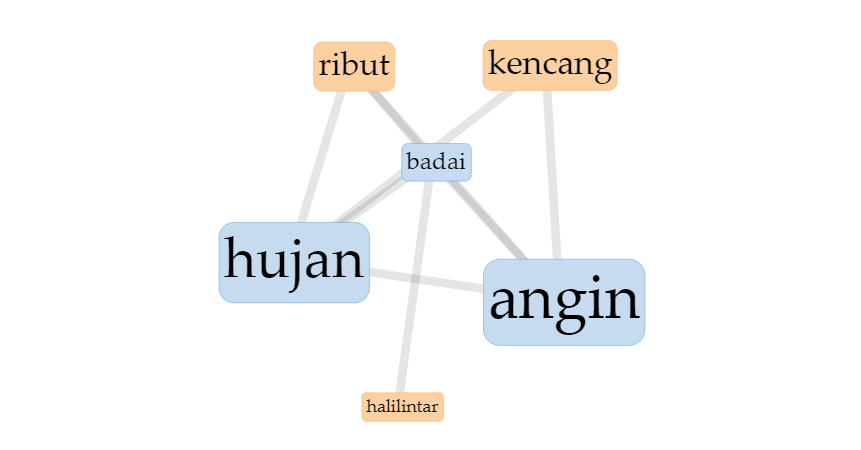

**Interpretasi Wordlink :** Dari wordlink diatas dapat kita lihat jika kita membicarakan mengenai angin maka topik yang ikut dibicarakan juga adalah terkait hujan, badai, dan kencang. Jika kita membicarakan badai maka topik-topik terkait yang juga ikut dibicarakan adalah hujan, angin, ribut, halilintar, dan kencang. Lalu jika kita membicarakan topik hujan, maka topik-topik yang ikut dibicarakan adalah topik mengenai angin, ribut, badai, dan kencang.

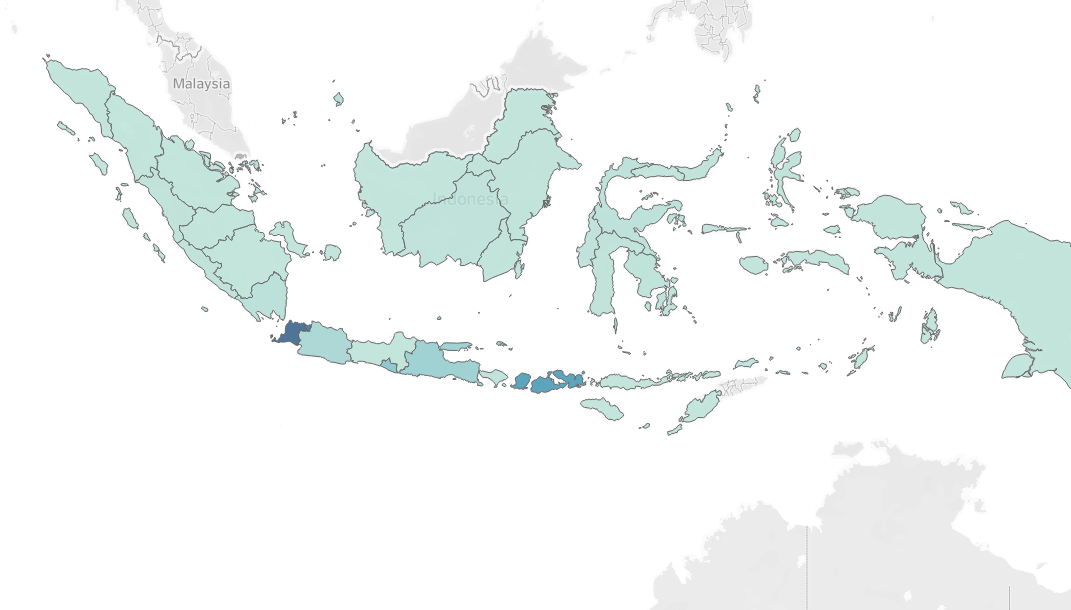

**Interpretasi Spatial Analysis :** Pada analisis spatial ini setelah kami menyimpan data berupa tweet dan jumlah retweet dari masing masing ibukota provinsi di seluruh Indonesia, kami melakukan visualisasi maps menggunakan aplikasi **Tableau**. Dari analisa ini semakin warna daerahnya gelap maka semakin banyak retweet terkait dengan topik "hujan angin", maka dari analisa diatas dapat kita lihat retweet terkait topik "hujan angin" paling banyak ada di pulau jawa dan sekitaran nusa tenggara, sedangkan di wilayah lain cenderung sedikit. kita bisa asumsikan bahwa di pulau jawa sering terjadi "hujan angin" berdasarkan data yang kita punya.